<a href="https://colab.research.google.com/github/ummd/ummd.github.io/blob/master/SolutionsAss5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Non-linearity

## Question 1 [15 marks] 

a) [3marks] When $\lambda$ is very large, the penalty term determines the shape of spline. This is because any value of the penalty term will be multiplied by a very large number.

When $m=0$, the penalty term is the integral of g() over its domain. So the resulting g() will have to be very small, i.e. $g(x)=0$.

b) [3marks] When $\lambda$ is very large, the penalty term determines the shape of spline. This is because any value of the penalty term will be multiplied by a very large number.

When $m=1$, the penalty term is determined by the first derivative of g() over its domain. A function g(x) which has $g^\prime(x)=0$ is a straight horizontal line. The infinitesimally small contribution of RSS will ensure this line passes through the average response, $\bar y$.

c) [3marks] When $\lambda$ is very large, the penalty term determines the shape of spline. This is because any value of the penalty term will be multiplied by a very large number.

When $m=2$, the penalty term is determined by the second derivative of g() over its domain. A function g(x) which has $g^{\prime\prime}(x)=0$ is a straight line. The infinitesinslly small contribution of RSS will ensure this line is the OLS fit.

d) [3marks] When $\lambda$ is very large, the penalty term determines the shape of spline. This is because any value of the penalty term will be multiplied by a very large number.

When $m=3$, the penalty term is determined by the third derivative of g() over its domain. A function g(x) which has $g^{\prime\prime\prime}(x)=0$ is a quadratic function (i.e. a parabola)

e) [3marks] When $\lambda=0$, the penalty term does not determine the shape of spline. This is because any value of the penalty term will be multiplied by 0. So the function g(x) will interploate the datapoints (i.e. pass through all of them)



## Question 2 [7 marks] 

This function will be linear up to X=1, then non-linear after that

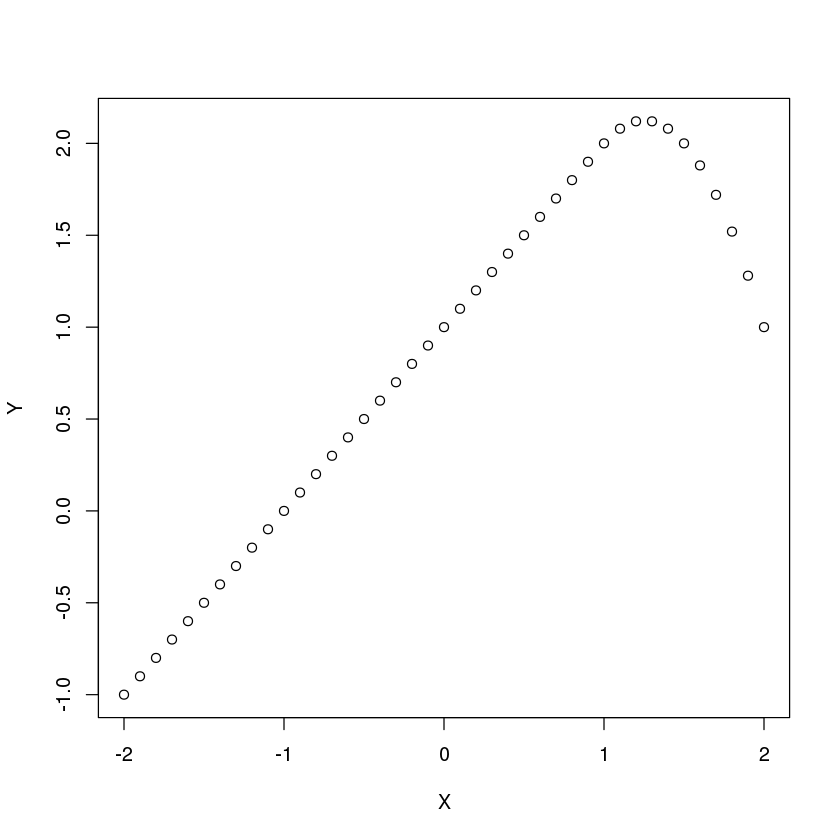

In [ ]:
X = seq(-2, 2, by=.1)
Y = 1 + X + -2 * (X-1)^2 * I(X>1)
plot(X, Y)

## Question 3 [18 marks]

a) [3 marks]

In [ ]:
set.seed(1)
library(MASS)
attach(Boston)

lm.fit = lm(nox ~ poly(dis, 3), data = Boston)
summary(lm.fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


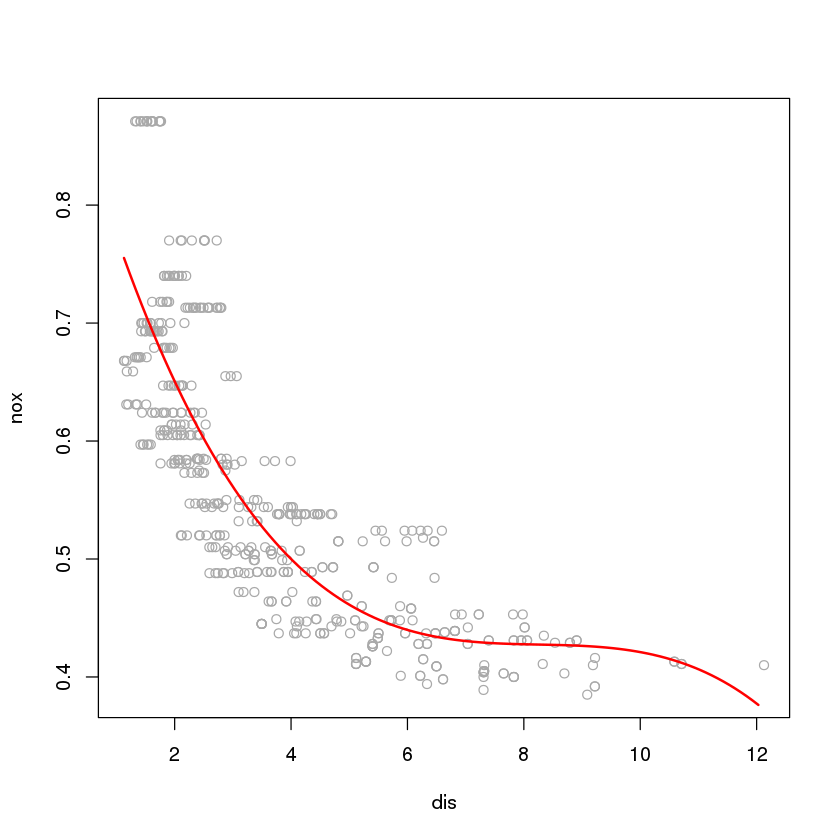

In [ ]:
dislim = range(dis)
dis.grid = seq(from = dislim[1], to = dislim[2], by = 0.1)
lm.pred = predict(lm.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, lm.pred, col = "red", lwd = 2)

b) [3 marks]

The RSS decreases as higher degree polynomials are added

In [ ]:
fits.rss = rep(NA, 10)
for (i in 1:10) {
    lm.fit = lm(nox ~ poly(dis, i), data = Boston)
    fits.rss[i] = sum(lm.fit$residuals^2)
}
fits.rss

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

c) [3 marks]

CV error is lowest at degree 4.

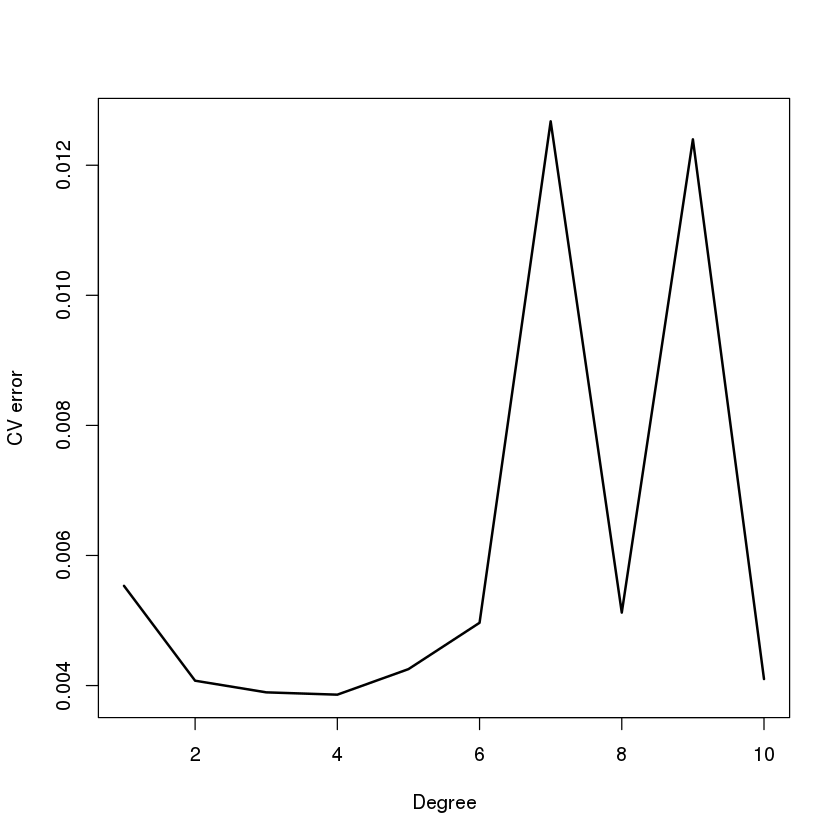

In [ ]:
library(boot)
all.deltas = rep(NA, 10)
for (i in 1:10) {
    glm.fit = glm(nox ~ poly(dis, i), data = Boston)
    all.deltas[i] = cv.glm(Boston, glm.fit, K = 10)$delta[2]
}
plot(1:10, all.deltas, xlab = "Ploynomial Degree", ylab = "CV Estimate of MSE", type = "l", pch = 20, 
    lwd = 2)

d) [3 marks]

We call the bs() funciton with the argument df=4 so that it has 4 degrees of freedom.

In [ ]:
library(splines)

sp.fit = lm(nox ~ bs(dis, df = 4), data = Boston)
summary(sp.fit)


Call:
lm(formula = nox ~ bs(dis, df = 4), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124622 -0.039259 -0.008514  0.020850  0.193891 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.73447    0.01460  50.306  < 2e-16 ***
bs(dis, df = 4)1 -0.05810    0.02186  -2.658  0.00812 ** 
bs(dis, df = 4)2 -0.46356    0.02366 -19.596  < 2e-16 ***
bs(dis, df = 4)3 -0.19979    0.04311  -4.634 4.58e-06 ***
bs(dis, df = 4)4 -0.38881    0.04551  -8.544  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06195 on 501 degrees of freedom
Multiple R-squared:  0.7164,	Adjusted R-squared:  0.7142 
F-statistic: 316.5 on 4 and 501 DF,  p-value: < 2.2e-16


The function bs() picks the knot at by default (given the degrees of freedom). For one knotm it picks the median.

In [ ]:
attr(bs(dis,df=4),"knots")

50% 
3.20745

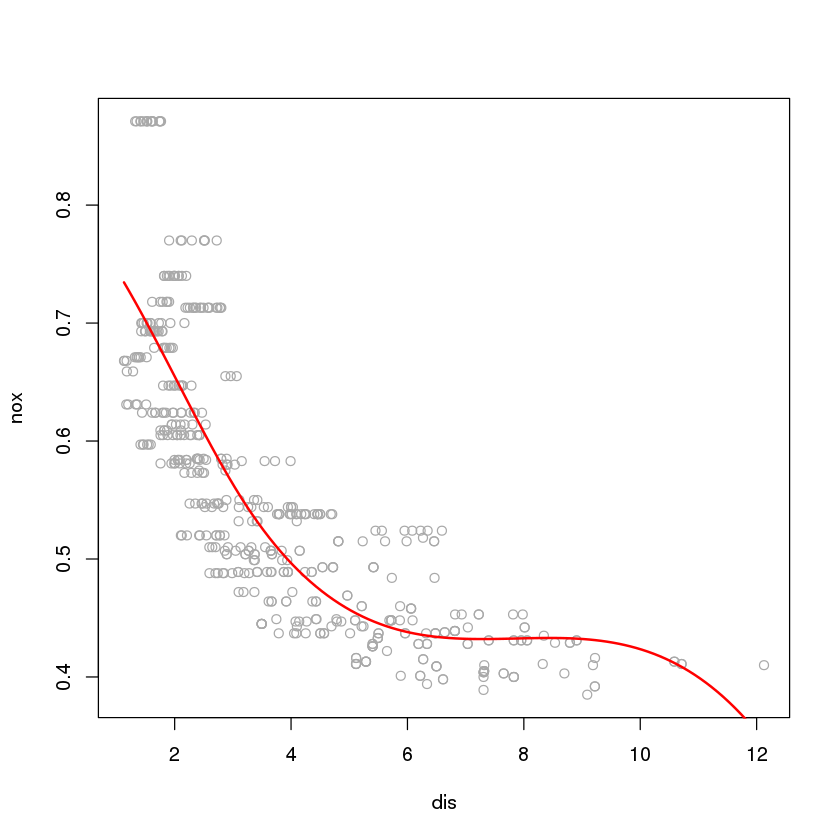

In [ ]:
sp.pred = predict(sp.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, sp.pred, col = "red", lwd = 2)

e) [3 marks]

We fit the spline for degrees of freedom between 3 and 20. As might be expected, RSS decreases as we ad more knots (degrees of freedom).

In [ ]:
all.cv = rep(NA, 20)
for (i in 3:20) {
    lm.fit = lm(nox ~ bs(dis, df = i), data = Boston)
    all.cv[i] = sum(lm.fit$residuals^2)
}
all.cv[-c(1, 2)]

[1] 1.934107 1.922775 1.840173 1.833966 1.829884 1.816995 1.825653 1.792535
 [9] 1.796992 1.788999 1.782350 1.781838 1.782798 1.783546 1.779789 1.775838
[17] 1.774487 1.776727

f) [3 marks]

We conduct a 10-fold cross-validation.

We can ignore the warning message. It just states that the basis functions for the splines have bad properties outside of the domain of X we are studying.

df=10 appears to be best model (using cross-validaton).

In [ ]:
all.cv = rep(NA, 20)
for (i in 3:20) {
    lm.fit = glm(nox ~ bs(dis, df = i), data = Boston)
    all.cv[i] = cv.glm(Boston, lm.fit, K = 10)$delta[2]
}

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2157), Boundary.knots = c(1.137, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2157), Boundary.knots = c(1.137, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”Warning message in bs(dis, deg

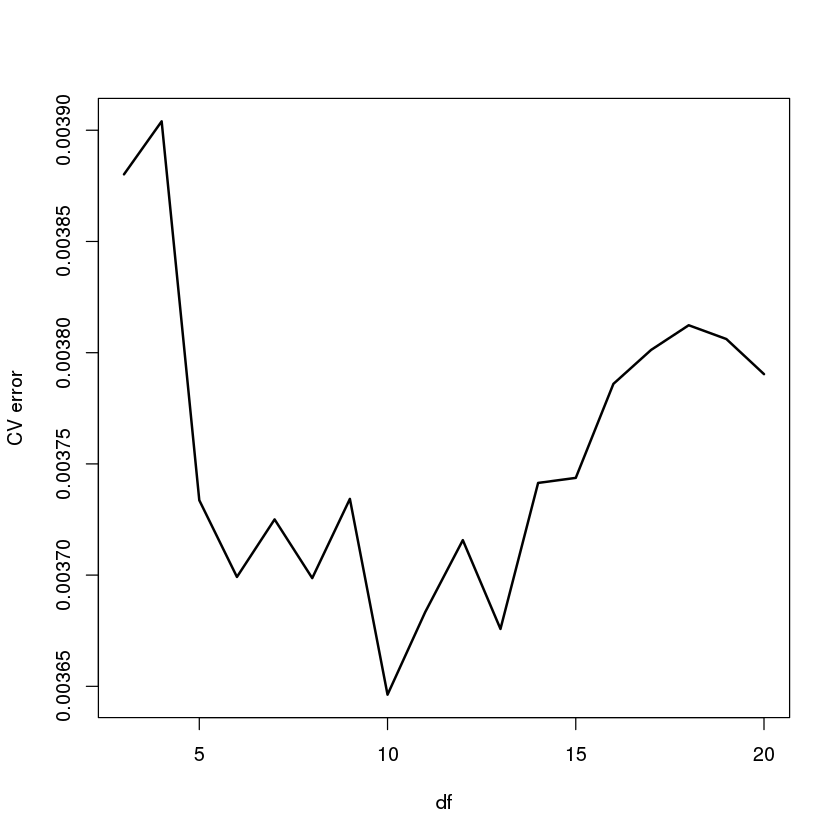

In [ ]:
plot(3:20, all.cv[-c(1, 2)], lwd = 2, type = "l", xlab = "df", ylab = "CV error")